# Neural Network

A simple implementation of neural network using only numpy. This neural network has only __1 hidden layer, with 256 neurons__.

<img src="https://cdn-images-1.medium.com/max/1600/1*RGV6Bb3ChmVWsA8Q6Qth6Q.png">

image taken from https://hackernoon.com/artificial-neural-network-a843ff870338

Supplemental notes on efficient implementation of softmax, and cross_entropy loss: https://deepnotes.io/softmax-crossentropy

Non-notebook version: https://github.com/rrmina/Neural-Network-Experiments/blob/master/01%20Softmax%20Regression.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mnist
from activation import relu, sigmoid, sigmoid_prime, softmax
from helper import one_hot_encoder
from initializer import initialize_weight
%matplotlib inline

In [2]:
def train(train_x, train_y, learning_rate=0.2, num_epochs=50):
    # Flatten input (batch_size, 28, 28) -> (batch_size, 784) 
    x = train_x.reshape(train_x.shape[0], -1)

    # Turn labels into their one-hot representations
    y = one_hot_encoder(train_y)

    # Initialize weights
    w1, b1 = initialize_weight((784, 256), bias=True)
    w2, b2 = initialize_weight((256, 10), bias=True)

    loss_history = []
    for epoch in range(1, num_epochs+1):
        print("Epoch {}/{}\n===============".format(epoch, num_epochs))

        # Forward Prop
        h1 = np.dot(x, w1) + b1
        a1 = sigmoid(h1)
        h2 = np.dot(a1, w2) + b2
        a2 = softmax(h2)
        out = a2

        # Cross Entropy Loss
        loss = cross_entropy_loss(out, train_y)
        loss_history.append(loss)
        print("Loss: {:.6f}".format(loss))

        # Compute and print accuracy
        pred = np.argmax(out, axis=1)
        pred = pred.reshape(pred.shape[0], 1)
        acc = np.mean(pred == train_y)
        print("Accuracy: {:.2f}%\n".format(acc*100))

        # Backward Prop
        m = out.shape[0]
        dh2 = a2 - y 
        dw2 = (1/m) * np.dot(a1.T, dh2)
        db2 = (1/m) * np.sum(dh2, axis=0, keepdims=True)
        
        dh1 = np.dot(dh2, w2.T) * sigmoid_prime(a1)
        dw1 = (1/m) * np.dot(x.T, dh1)
        db1 = (1/m) * np.sum(dh1, axis=0, keepdims=True)

        # Weight (and bias) update
        w1 -= learning_rate * dw1
        b1 -= learning_rate * db1
        w2 -= learning_rate * dw2
        b2 -= learning_rate * db2

    return w1, b1, w2, b2, loss_history

def cross_entropy_loss(out, y):
    batch_size = y.shape[0]
    y = y.reshape(batch_size)
    log_likelihood = -np.log(out[np.arange(batch_size), y])
    return np.sum(log_likelihood) / batch_size

In [3]:
# Load dataset
train_x, train_y = mnist.load_dataset(download=True, train=True)
test_x, test_y = mnist.load_dataset(download=True, train=False)

# Train
w1, b1, w2, b2, loss_history = train(train_x, train_y, learning_rate=0.2, num_epochs=50)

Found and verified data/t10k-images-idx3-ubyte.gz
Found and verified data/t10k-labels-idx1-ubyte.gz
Found and verified data/train-images-idx3-ubyte.gz
Found and verified data/train-labels-idx1-ubyte.gz
Found and verified data/t10k-images-idx3-ubyte.gz
Found and verified data/t10k-labels-idx1-ubyte.gz
Found and verified data/train-images-idx3-ubyte.gz
Found and verified data/train-labels-idx1-ubyte.gz
Epoch 1/50
Loss: 2.511085
Accuracy: 9.69%

Epoch 2/50
Loss: 2.225475
Accuracy: 28.57%

Epoch 3/50
Loss: 1.890559
Accuracy: 41.24%

Epoch 4/50
Loss: 1.582649
Accuracy: 48.87%

Epoch 5/50
Loss: 1.410773
Accuracy: 60.72%

Epoch 6/50
Loss: 1.218492
Accuracy: 65.88%

Epoch 7/50
Loss: 1.170003
Accuracy: 64.91%

Epoch 8/50
Loss: 1.176706
Accuracy: 68.82%

Epoch 9/50
Loss: 0.943443
Accuracy: 75.05%

Epoch 10/50
Loss: 0.930182
Accuracy: 71.97%

Epoch 11/50
Loss: 0.884240
Accuracy: 75.82%

Epoch 12/50
Loss: 0.869725
Accuracy: 73.38%

Epoch 13/50
Loss: 0.811489
Accuracy: 77.89%

Epoch 14/50
Loss: 0.7

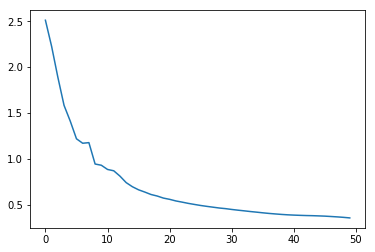

In [4]:
# Plot Loss history
plt.plot(loss_history, label="Training Loss")

In [5]:
def test(test_x, test_y, w1, b1, w2, b2):
    # Flatten input (batch_size, 28, 28) -> (batch_size, 784) 
    x = test_x.reshape(test_x.shape[0], -1)

    # Turn labels into their one-hot representations
    y = one_hot_encoder(test_y)

    # Forward Pass
    h1 = np.dot(x, w1) + b1
    a1 = sigmoid(h1)
    h2 = np.dot(a1, w2) + b2
    a2 = softmax(h2)
    out = a2

    # Cross Entropy Loss
    loss = cross_entropy_loss(out, test_y)
    print("Loss: {:.6f}".format(loss))

    # Compute and print accuracy
    pred = np.argmax(out, axis=1)
    pred = pred.reshape(pred.shape[0], 1)
    acc = np.mean(pred == test_y)
    print("Accuracy: {:.2f}%\n".format(acc*100))
    
test(test_x, test_y, w1, b1, w2, b2)

Loss: 0.356336
Accuracy: 90.66%



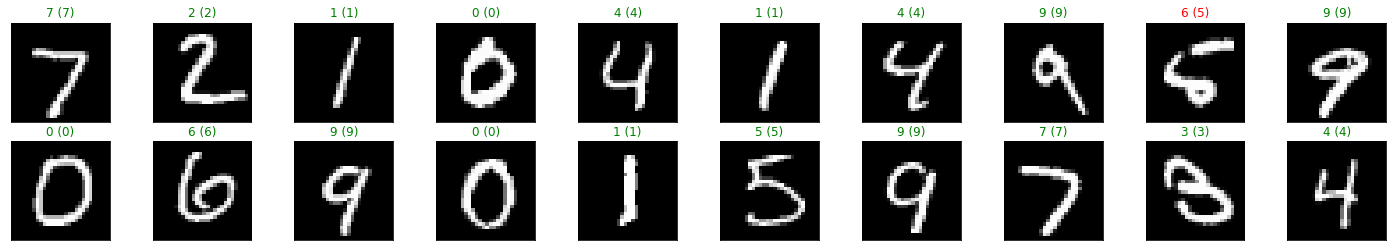

In [6]:
def visualization(w1, b1, w2, b2):
    x = test_x[:20]
    x = x.reshape(x.shape[0], -1)
    y = test_y[:20]
    
    # Forward Pass
    h1 = np.dot(x, w1) + b1
    a1 = sigmoid(h1)
    h2 = np.dot(a1, w2) + b2
    a2 = softmax(h2)
    out = a2    
    pred = np.argmax(out, axis=1)
    
    fig = plt.figure(figsize=(25, 4))
    for index in np.arange(20):
        ax = fig.add_subplot(2, 20/2, index+1, xticks=[], yticks=[])
        ax.imshow(test_x[index], cmap='gray')
        ax.set_title("{} ({})".format(str(pred[index]), str(y[index][0])), 
                     color=("green" if pred[index] == y[index] else "red"))
        
visualization(w1, b1, w2, b2)